## Statistical arbitrage with Cointegration and correlation

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import json
import math
import datetime

from yahoofinancials import YahooFinancials

from bs4 import BeautifulSoup

In [3]:
ticker_1 = "UGL"
ticker_2 = "NUGT"
ticker_3 = "ETH-USD"
ticker_4 = "COIN" 
tickers = [ticker_1, ticker_2, ticker_3, ticker_4]

start_date = "2022-12-11" 

end_date = str(datetime.date.today()) # "2019-3-30"# 

update = True

if update:
	stocks = YahooFinancials(tickers)
	historical_price = stocks.get_historical_price_data(start_date, end_date, "Daily")

	with open('data/data_arbitrage.py', 'w') as outfile:
	
		outfile.write("historical_price=")

		json.dump(historical_price, outfile)

else:
	from data.data_arbitrage import historical_price

	historical_price = historical_price
    
chart_data = {}
other_tickers = {}
longest = 0
longest_ticker = "ICE"


for ticker in tickers:
	# for all data before sorting
	# print ticker
	chart_data[ticker] = historical_price[ticker]["prices"]

	other_tickers[ticker] = len(historical_price[ticker]["prices"])

	if len(historical_price[ticker]["prices"]) > longest:

		longest = len(historical_price[ticker]["prices"])

		longest_ticker = ticker

save_data = {}
save_data["date"] = []
save_data["formatted_date"] = []

In [4]:
print("%s len: %d" % (ticker_1, len(chart_data[ticker_1])))
print("%s len: %d" % (ticker_1, len(chart_data[ticker_1])))
print("%s len: %d" % (ticker_2, len(chart_data[ticker_2])))
print("%s len: %d" % (ticker_2, len(chart_data[ticker_2])))

UGL len: 422
UGL len: 422
NUGT len: 422
NUGT len: 422


In [5]:
ticker_1, ticker_2 = "UGL", "NUGT"
pd_1 = pd.DataFrame(chart_data[ticker_1]) #pd.read_csv("data/dtickers/"+ticker_1+".csv")
pd_2 = pd.DataFrame(chart_data[ticker_2]) #pd.read_csv("data/dtickers/"+ticker_2+".csv")
df_test = pd.DataFrame()
df_test[ticker_1] = pd_1.adjclose
df_test[ticker_2] = pd_2.adjclose
df_test["date"] = pd_2.formatted_date
prices=df_test.set_index("date")
prices

,UGL,NUGT
date,,
2022-12-12,53.040001,33.454002
2022-12-13,54.840000,35.329750
2022-12-14,54.590000,35.078358
2022-12-15,52.720001,31.974684
2022-12-16,53.590000,32.380772
...,...,...
2024-08-12,85.680000,43.560001
2024-08-13,85.379997,44.720001
2024-08-14,83.949997,44.119999


In [6]:
def load_ticker_data(ticker, chart_data):
    rf_list = list()
    for i in range(0, len(chart_data[ticker]) ):
        rf_list.append( [ pd.to_datetime(chart_data[ticker][i]["formatted_date"]), \
                    chart_data[ticker][i]["adjclose"], chart_data[ticker][i]["high"],\
                    chart_data[ticker][i]["low"], chart_data[ticker][i]["open"],
                    chart_data[ticker][i]["close"], chart_data[ticker][i]["volume"]  
                    ])
    df = pd.DataFrame(rf_list, columns=["date", "adjclose", "high","low", "open", "close", "volume"])
    df = df.set_index("date")
    return df

data_dict = {}
for ticker in tickers:
    data_dict[ticker] = load_ticker_data(ticker, chart_data)

#df_final = load_ticker_data(ticker_1, chart_data)


In [7]:
df_final = pd.DataFrame()
df_final[ticker_1] = data_dict[ticker_1].open
df_final[ticker_2] = data_dict[ticker_2].open
df_final.dropna()


,UGL,NUGT
date,,
2022-12-12,53.520000,34.230000
2022-12-13,55.330002,37.099998
2022-12-14,54.750000,36.619999
2022-12-15,52.970001,34.150002
2022-12-16,53.130001,33.020000
...,...,...
2024-08-12,83.970001,41.900002
2024-08-13,85.470001,43.349998
2024-08-14,84.250000,43.990002


In [8]:
prices = pd.DataFrame()

for ticker in tickers:
    prices[ticker] = data_dict[ticker].open


returns = prices.pct_change().fillna(0)
returns

,UGL,NUGT,ETH-USD,COIN
date,,,,
2022-12-12,0.000000,0.000000,0.000000,0.000000
2022-12-13,0.033819,0.083845,0.008776,0.150825
2022-12-14,-0.010483,-0.012938,0.036108,-0.143447
2022-12-15,-0.032511,-0.067449,-0.008706,-0.011672
2022-12-16,0.003021,-0.033089,-0.032639,-0.039795
...,...,...,...,...
2024-08-12,0.011931,0.017731,-0.048523,0.015735
2024-08-13,0.017864,0.034606,0.066891,-0.006022
2024-08-14,-0.014274,0.014764,-0.007604,0.040232


In [9]:
#np.std(prices)
cumreturns = (returns+1).cumprod()
cumreturns

,UGL,NUGT,ETH-USD,COIN
date,,,,
2022-12-12,1.000000,1.000000,1.000000,1.000000
2022-12-13,1.033819,1.083845,1.008776,1.150825
2022-12-14,1.022982,1.069822,1.045201,0.985743
2022-12-15,0.989723,0.997663,1.036102,0.974237
2022-12-16,0.992713,0.964651,1.002285,0.935468
...,...,...,...,...
2024-08-12,1.568946,1.224073,2.020853,4.859930
2024-08-13,1.596973,1.266433,2.156031,4.830666
2024-08-14,1.574178,1.285130,2.139636,5.025012


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

# create two time series

x = prices["UGL"]
y = prices["NUGT"]

# test for cointegration
t_stat, p_value, _ = coint(x, y)
print("corr: %s" % x.corr(y))
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# P-value and correlation are not good for arbitrage, but this is a demo.

corr: 0.5547578838482627
T-statistic: -0.4778
P-value: 0.9659


In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate two non-stationary time series

x = prices["ETH-USD"]
y = prices["COIN"]

# Compute the cointegration test
result = sm.tsa.stattools.coint(x, y)

# Print the p-value
print('p-value:', result[1])

corr = returns["ETH-USD"].corr(returns["COIN"])
print('Correlation:\n', corr)

p-value: 0.00435330106333925
Correlation:
 0.37493750060406217


In [12]:
#high_corr_pairs = [(corr.index[i], corr.index[j]) for i in range(len(corr)) for j in range(i+1, len(corr)) if corr[i] > 0.8 and corr[j] > 0.8]
#high_corr_pairs

In [13]:
high_corr_pairs = [("UGL", "NUGT")] #, ("COIN", "ETH-USD")

In [43]:
trades = []
print(sm.add_constant(returns[[stock1, stock2]]))
for pair in high_corr_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    spread = prices[stock1] - prices[stock2]
    
    spread_mean = np.mean(spread)
    spread_std = np.std(spread)
    z_score = (spread - spread_mean) / spread_std
    #print(z_score)
    #model = sm.OLS(z_score, ).fit()
    print(z_score)
    model = sm.OLS(z_score[1:], sm.add_constant(returns[[stock1, stock2]][1:])).fit()
    
    trades.append((stock1, stock2, model.params[1], model.params[2]))

model.params

            const       UGL      NUGT
date                                 
2022-12-12    1.0  0.000000  0.000000
2022-12-13    1.0  0.033819  0.083845
2022-12-14    1.0 -0.010483 -0.012938
2022-12-15    1.0 -0.032511 -0.067449
2022-12-16    1.0  0.003021 -0.033089
...           ...       ...       ...
2024-08-12    1.0  0.011931  0.017731
2024-08-13    1.0  0.017864  0.034606
2024-08-14    1.0 -0.014274  0.014764
2024-08-15    1.0 -0.001187  0.005456
2024-08-16    1.0  0.030897  0.035496

[422 rows x 3 columns]
date
2022-12-12   -1.243982
2022-12-13   -1.382478
2022-12-14   -1.395544
2022-12-15   -1.305391
2022-12-16   -1.136843
                ...   
2024-08-12    1.732386
2024-08-13    1.738919
2024-08-14    1.495896
2024-08-15    1.451473
2024-08-16    1.586050
Length: 422, dtype: float64


C:\Users\charles\AppData\Local\Temp\ipykernel_13456\3319020151.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trades.append((stock1, stock2, model.params[1], model.params[2]))


const   -0.002700
UGL      6.779156
NUGT    -2.165785
dtype: float64

In [42]:
trades

[('UGL', 'NUGT', 6.779156397934097, -2.1657849598015346)]

In [16]:

for trade in trades:
    stock1 = trade[0]
    stock2 = trade[1]
    beta1 = trade[2]
    beta2 = trade[3]
    spread = prices[stock1] - prices[stock2]
    spread_mean = np.mean(spread)
    spread_std = np.std(spread)
    
    z_score = (spread - spread_mean) / spread_std
    print(z_score)
    if z_score[-1] > 1.6:
        # enter a long position in stock1 and a short position in stock2
        print("long: %s, short: %s" % (stock1, stock2))
    elif z_score[-1] < -1.6:
        # enter a short position in stock1 and a long position in stock2
        print("long: %s, short: %s" % (stock2, stock1))

In [17]:
pd.set_option('display.max_columns', None)
z = pd.DataFrame(z_score)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


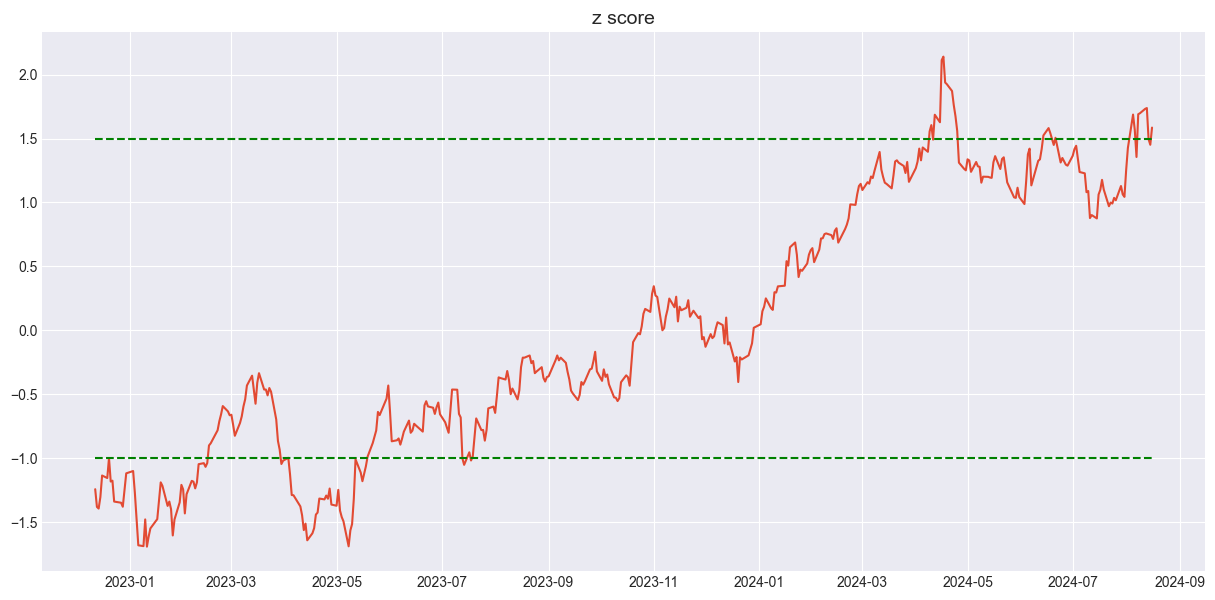

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-v0_8-darkgrid')
# specifying horizontal line type 

plt.figure(figsize=(15,7))
plt.plot(z_score)
plt.hlines(1.5, z_score.index[0], z_score.index[-1], linestyles='dashed', colors='g')

plt.hlines(-1, z_score.index[0], z_score.index[-1], linestyles='dashed', colors='g')
plt.title('z score', fontsize=14)
# rendering the plot 
plt.grid(True)
plt.show()


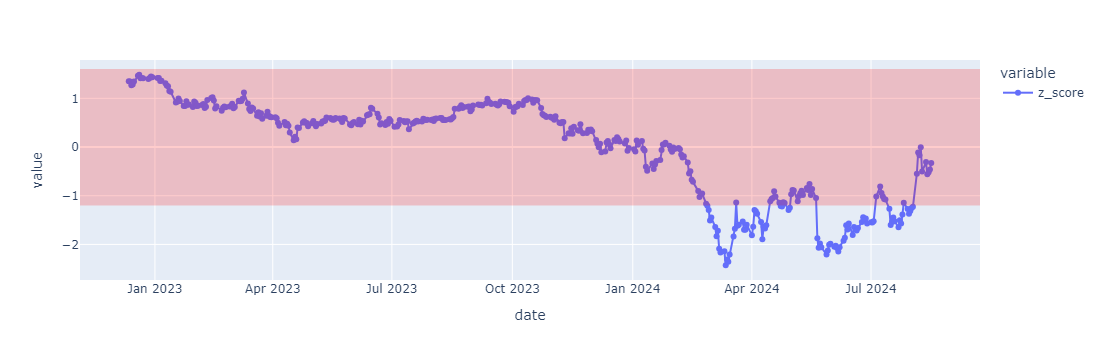

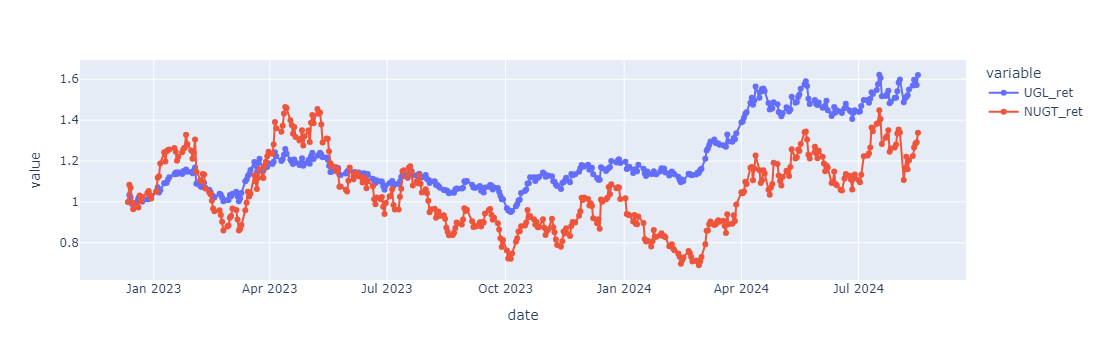

In [79]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
import plotly as py
import plotly.graph_objs as go
import plotly.offline as offline_py

offline_py.init_notebook_mode(connected=True)
df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(df_test)

fig.update_traces(mode='markers+lines')
fig.add_hrect(y0=-1.2, y1=1.6, line_width=0, fillcolor="red", opacity=0.2)
fig.show()

ret1 = cumreturns["UGL"]
ret2 = cumreturns["NUGT"]

df_fig3 = pd.DataFrame()
df_fig3["UGL_ret"] = ret1
df_fig3["NUGT_ret"] = ret2

fig3 = px.scatter(df_fig3)

fig3.update_traces(mode='markers+lines')

fig3.show()

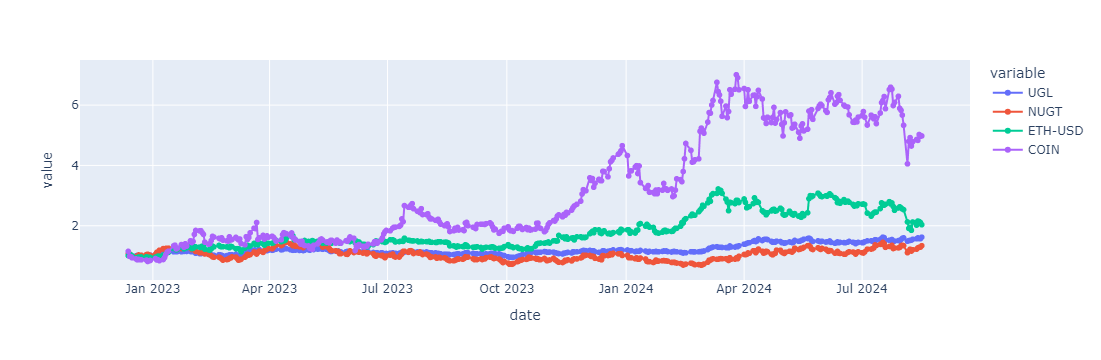

In [42]:
df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(cumreturns)

fig.update_traces(mode='markers+lines')

fig.show()

## Backtesting with a scaler applied

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# create a sample DataFrame
df = pd.DataFrame({ticker_1: data_dict[ticker_1]["open"], ticker_2: data_dict[ticker_2]["open"]})

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
standardized_data = scaler.fit_transform(df)

# create a new DataFrame with the standardized data
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

print(df_standardized)

          UGL      NUGT
0   -1.233863 -0.279077
1   -1.035077  0.188304
2   -1.098777  0.110136
3   -1.294268 -0.292104
4   -1.276696 -0.476126
..        ...       ...
417  2.110351  0.969988
418  2.275091  1.206121
419  2.141102  1.310346
420  2.130120  1.349430
421  2.415668  1.605105

[422 rows x 2 columns]


In [57]:

df_standardized['z_score'] = df_standardized["UGL"]- df_standardized["NUGT"]


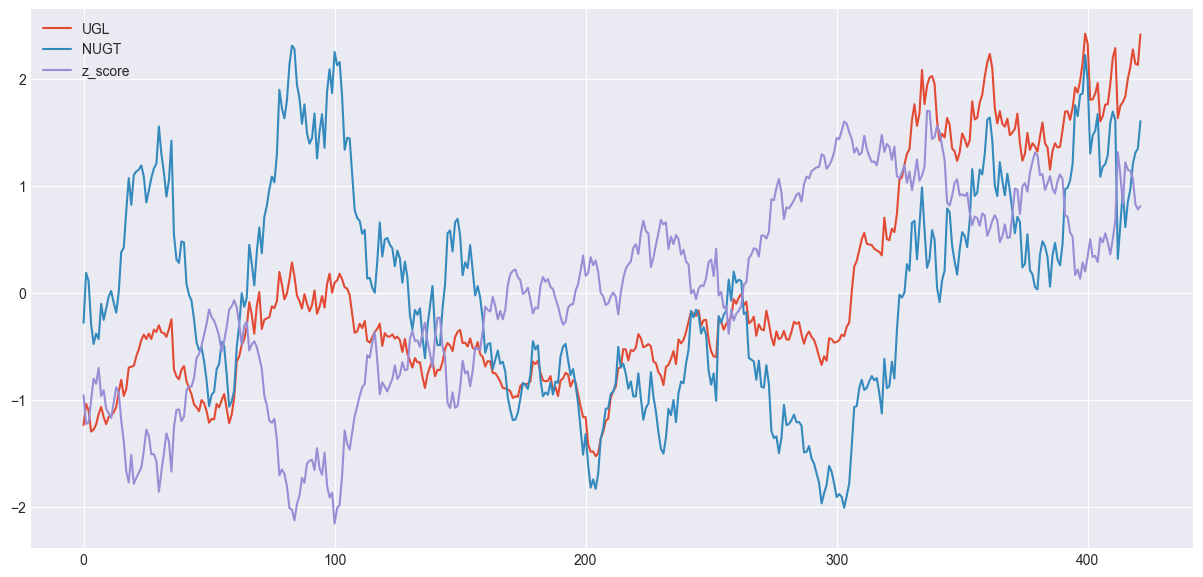

In [59]:
#df_test = pd.DataFrame(z_score, columns=["z_score"])
import matplotlib.pyplot as plt


plt.figure(figsize=(15,7))
plt.plot(df_standardized)
plt.legend(df_standardized.columns)

plt.show()

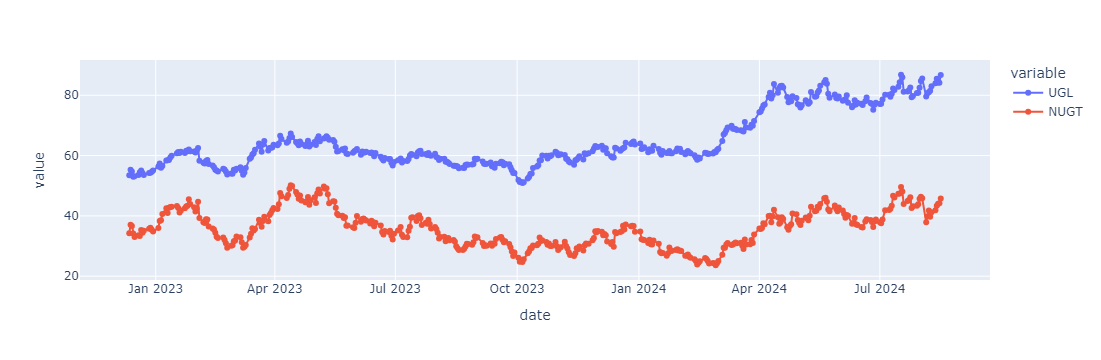

In [60]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
import plotly as py
import plotly.graph_objs as go
import plotly.offline as offline_py

offline_py.init_notebook_mode(connected=True)
#df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(df_final["2018-06-25":])

fig.update_traces(mode='markers+lines')

fig.show()